In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from numpy.random import default_rng
rng = default_rng()
rand = rng.random


In [2]:
num_steps = 500 #number of steps for the walk

X_rand = 1*(rand(num_steps) > 0.8)
Y_rand = 2*(rand(num_steps) < 0.5) - 1
X = X_rand.cumsum()
Y = Y_rand.cumsum()


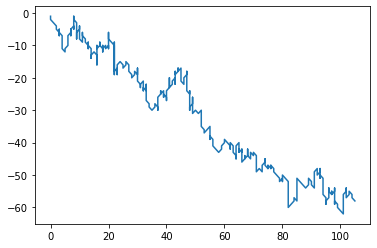

In [3]:
plt.plot(X,Y)

In [4]:
beta = 1
rand_num = -((1/beta) * np.log(rand(800))).cumsum()
time = rand_num[(rand_num > 0) * (rand_num < 200)]

In [31]:
x_step = [0,1]
x_prob = [0.9,0.1]
y_step = [-1,0,1]
y_prob = [0.3,0.4,0.3]
num_trials = 10
X = np.random.choice(x_step, (num_trials,len(time)),x_prob)
Y = np.random.choice(y_step, (num_trials,len(time)),y_prob)

start_pt = np.arange(-5,5,1)
y_start = np.random.choice(start_pt,num_trials)
for j in range(9):
    Y[j,0] = Y[j,0]+y_start[j] 

In [32]:
X_cords = np.empty(X.shape)
Y_cords = np.empty(Y.shape)
X_n = np.empty(num_trials) 
Y_n = np.empty(num_trials) 
X0 = np.empty(num_trials)
Y0 = np.empty(num_trials) 
for i in range(len(X)):
    X_cords[i] = X[i].cumsum()
    Y_cords[i] = Y[i].cumsum()
for n in range(10):
    X_n[n] = X_cords[n,-1]
    Y_n[n] = Y_cords[n,-1]
    X0[n] = X_cords[n,0]
    Y0[n] = Y_cords[n,0]
length1 = X_n - X0
vert_displacement = Y_n - Y0

In [33]:
print(length1)
print(vert_displacement)
print(vert_displacement.mean())
print(length.mean())

[105.  96.  89. 101. 103. 102.  91.  87. 105.  83.]
[-11. -19. -10.   1.  -6.  14.  17.  -2.  15. -22.]
-2.3
96.2


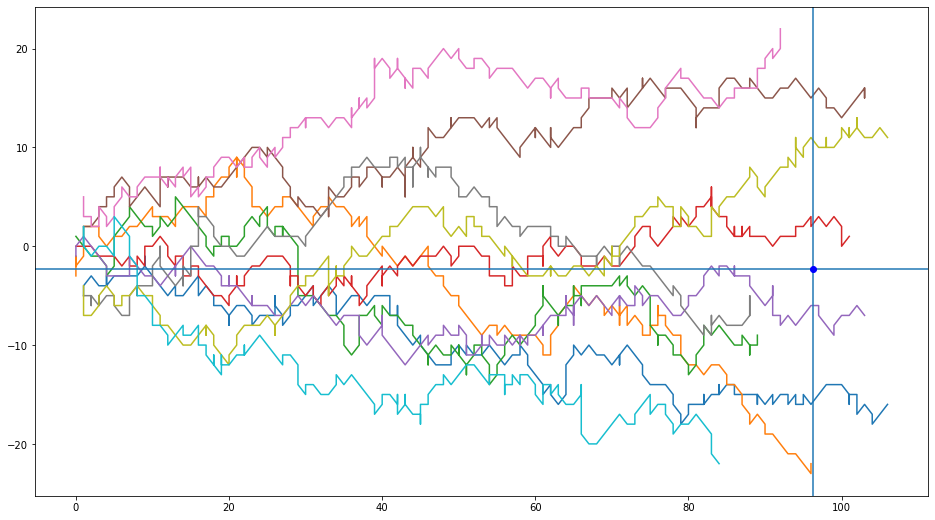

In [34]:
plt.figure(figsize = (16,9))
plt.plot(X_cords[0],Y_cords[0])
plt.plot(X_cords[1],Y_cords[1])
plt.plot(X_cords[2],Y_cords[2])
plt.plot(X_cords[3],Y_cords[3])
plt.plot(X_cords[4],Y_cords[4])
plt.plot(X_cords[5],Y_cords[5])
plt.plot(X_cords[6],Y_cords[6])
plt.plot(X_cords[7],Y_cords[7])
plt.plot(X_cords[8],Y_cords[8])
plt.plot(X_cords[9],Y_cords[9])
plt.axhline(y=vert_displacement.mean())
plt.axvline(x=length.mean())
plt.plot(length.mean(),vert_displacement.mean(),"ob")

In [9]:
length = len(X_cords[0])
coord_1 = np.empty([length,2])
coord_2 = np.empty([length,2])
coord_3 = np.empty([length,2])
coord_4 = np.empty([length,2])
coord_5 = np.empty([length,2])
coord_6 = np.empty([length,2])
coord_7 = np.empty([length,2])
coord_8 = np.empty([length,2])
coord_9 = np.empty([length,2])
coord_10 = np.empty([length,2])
for i in range(length):
    coord_1[i] = [X_cords[0,i],Y_cords[0,i]]
    coord_2[i] = [X_cords[1,i],Y_cords[1,i]]
    coord_3[i] = [X_cords[2,i],Y_cords[2,i]]
    coord_4[i] = [X_cords[3,i],Y_cords[3,i]]
    coord_5[i] = [X_cords[4,i],Y_cords[4,i]]
    coord_6[i] = [X_cords[5,i],Y_cords[5,i]]
    coord_7[i] = [X_cords[6,i],Y_cords[6,i]]
    coord_8[i] = [X_cords[7,i],Y_cords[7,i]]
    coord_9[i] = [X_cords[8,i],Y_cords[8,i]]
    coord_10[i] = [X_cords[9,i],Y_cords[9,i]]


In [30]:
#test = (coord_1==coord_2)
#test = test.T
#test = test[0]*1 + test[1]*1 == 2
#collison = np.where(test == True)
#collison
#test

In [13]:
#plt.figure()
#plt.plot(X_cords[0],Y_cords[0])
#plt.plot(X_cords[1,:int(collison[0][0])],Y_cords[1,:int(collison[0][0])])
#plt.plot(X_cords[2],Y_cords[2])
#plt.plot(X_cords[3],Y_cords[3])

Text(0.5, 0, 'Y')

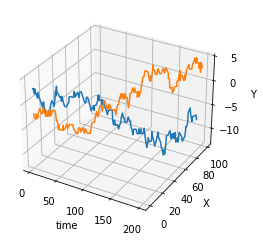

In [14]:
ax = plt.axes(projection='3d')
#ax.figure(dpi=200)
ax.plot3D(time,X_cords[0],Y_cords[0])
ax.plot3D(time,X_cords[1],Y_cords[1])
ax.set_xlabel('time')
ax.set_ylabel('X')
ax.set_zlabel('Y')